# Import needed Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading the Data

In [2]:
df = pd.read_csv("/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv")

**Attribute Information:**
* invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.
* customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.
* gender: String variable of the customer's gender.
* age: Positive Integer variable of the customers age.
* category: String variable of the category of the purchased product.
* quantity: The quantities of each product (item) per transaction. Numeric.
* price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).
* payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.
* invoice_date: Invoice date. The day when a transaction was generated.
* shopping_mall: String variable of the name of the shopping mall where the transaction was made

# Exploring the Data

In [3]:
df.shape

(99457, 10)

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


**when make discribe to data as null or not we found not null but found wrong in the data type in column invoice date should be datetime and anthor column but we not want to change the types for this columns**

In [7]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


**From describe the stat info we found outlier in price column when mean is 689.256321 and the min 5.230 and the max is 5250 then there are outliers in this column**

In [8]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

**No have nan value in the data**

In [9]:
df.duplicated().sum()

0

**No have Duplicated value in the data**

# Cleaning the Data

In [10]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [11]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

**Change type of the invoice_date column to can deal with this column**

In [12]:
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

In [13]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


**Add 2 colmns to make easier to deal with years and months**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  year            99457 non-null  int32         
 11  month           99457 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 8.3+ MB


**we can see the change that happen in type of the date column and add two another columns to data**

# Analysis and Visualization

In [15]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


<h2>Gender<h2>

In [16]:
Gender = df['gender'].value_counts().reset_index()
Gender

,gender,count
0,Female,59482
1,Male,39975


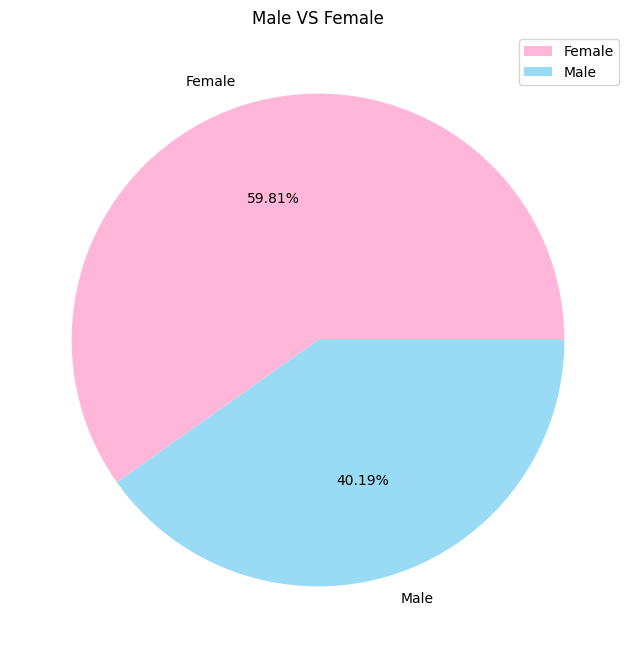

In [17]:
plt.figure(figsize=(8,8))
plt.pie(Gender['count'],
        labels=Gender['gender'],autopct='%1.2f%%',
        colors=["#FFB6D9", "#99DBF5"]
       )
plt.title('Male VS Female')
plt.legend()
plt.show()

**From this pie graph we can see the female is more than male when do shopping**

<h2>Gender with Category<h2>

In [18]:
Genderwithcatergory = df.groupby('gender')['category'].value_counts().reset_index()
Genderwithcatergory

,gender,category,count
0,Female,Clothing,20652
1,Female,Cosmetics,9070
2,Female,Food & Beverage,8804
3,Female,Toys,6085
4,Female,Shoes,5967
5,Female,Souvenir,3017
6,Female,Technology,2981
7,Female,Books,2906
8,Male,Clothing,13835
9,Male,Cosmetics,6027


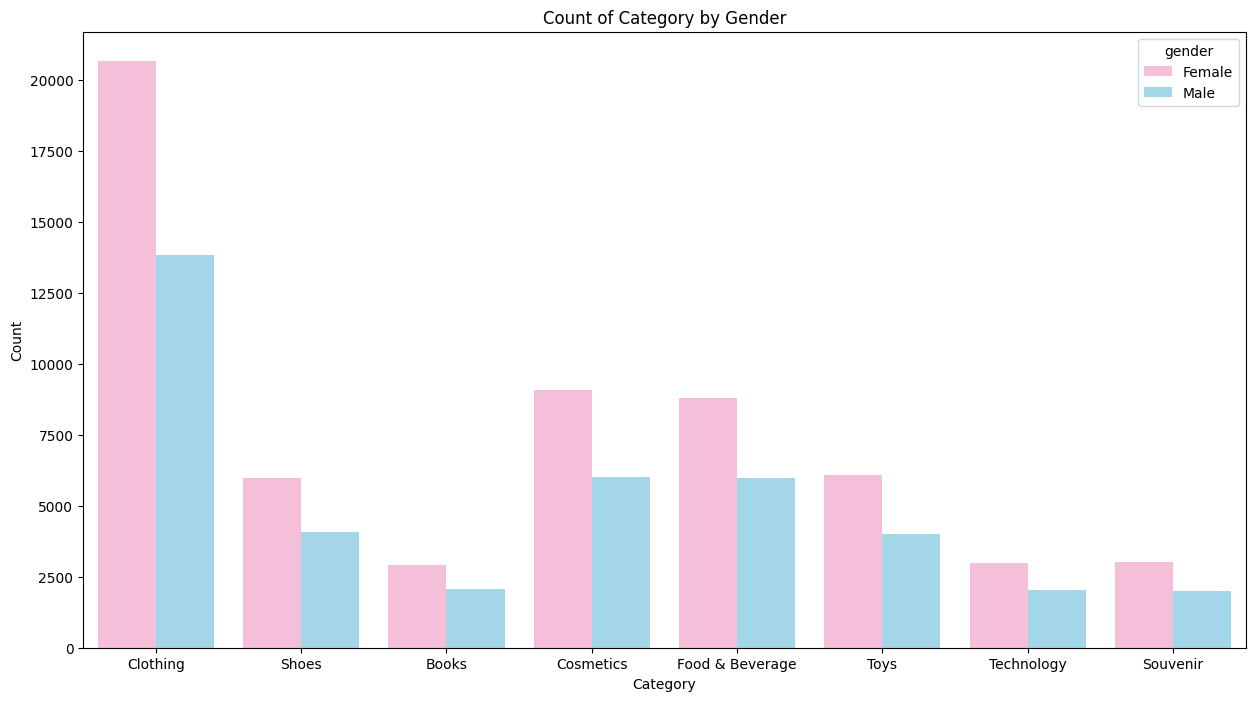

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x=df['category'], hue=df['gender'],palette=["#FFB6D9", "#99DBF5"])
plt.title('Count of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**From this graph we can see the most type of male and female buy colthing and few but books and tech and souvenir**

<h2>Gender with average age<h2>

In [20]:
Genderwithavgage = df.groupby('gender')['age'].mean().reset_index()
Genderwithavgage

,gender,age
0,Female,43.453515
1,Male,43.387767


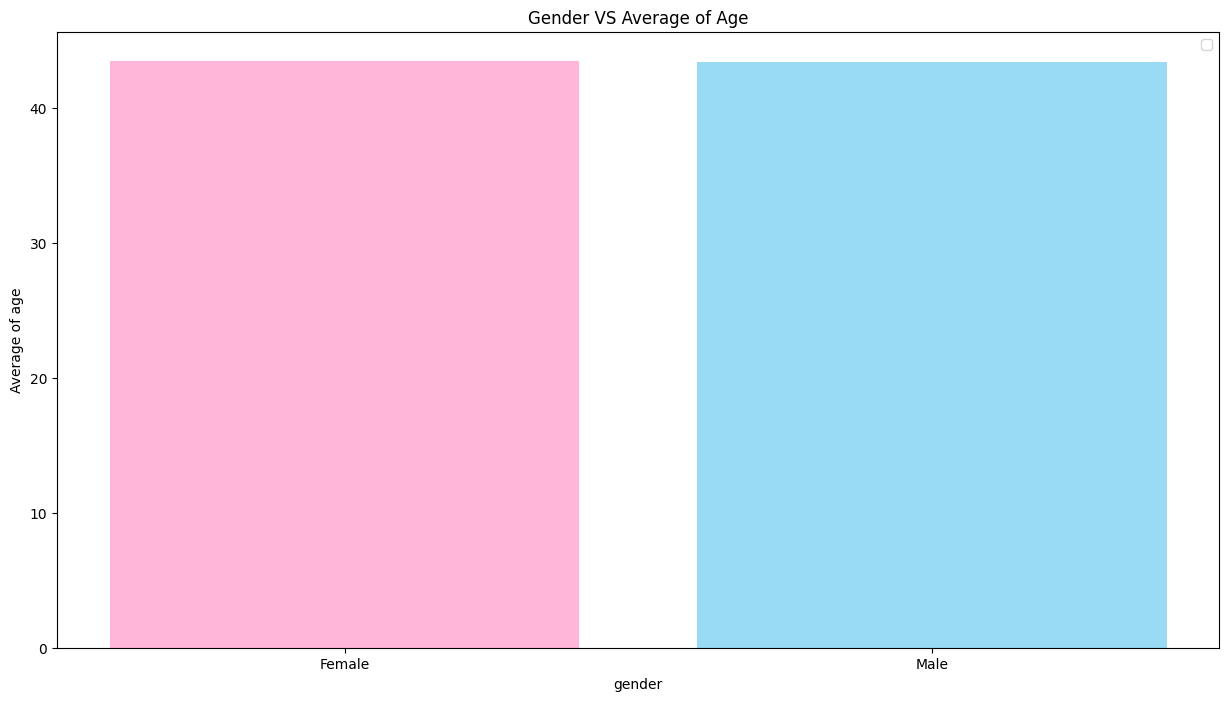

In [21]:
plt.figure(figsize=(15, 8))
colors = ["#FFB6D9", "#99DBF5"]
plt.bar(Genderwithavgage['gender'],Genderwithavgage['age'], color=colors)
plt.xlabel('gender')
plt.ylabel('Average of age')
plt.title('Gender VS Average of Age')
plt.legend()
plt.show()

**This Graph show the Average of male and female in the data**

<h2>Gender with Price<h2>

In [22]:
Genderwithprice = df.groupby('gender')['price'].sum().reset_index()
Genderwithprice

,gender,price
0,Female,40931801.62
1,Male,27619564.29


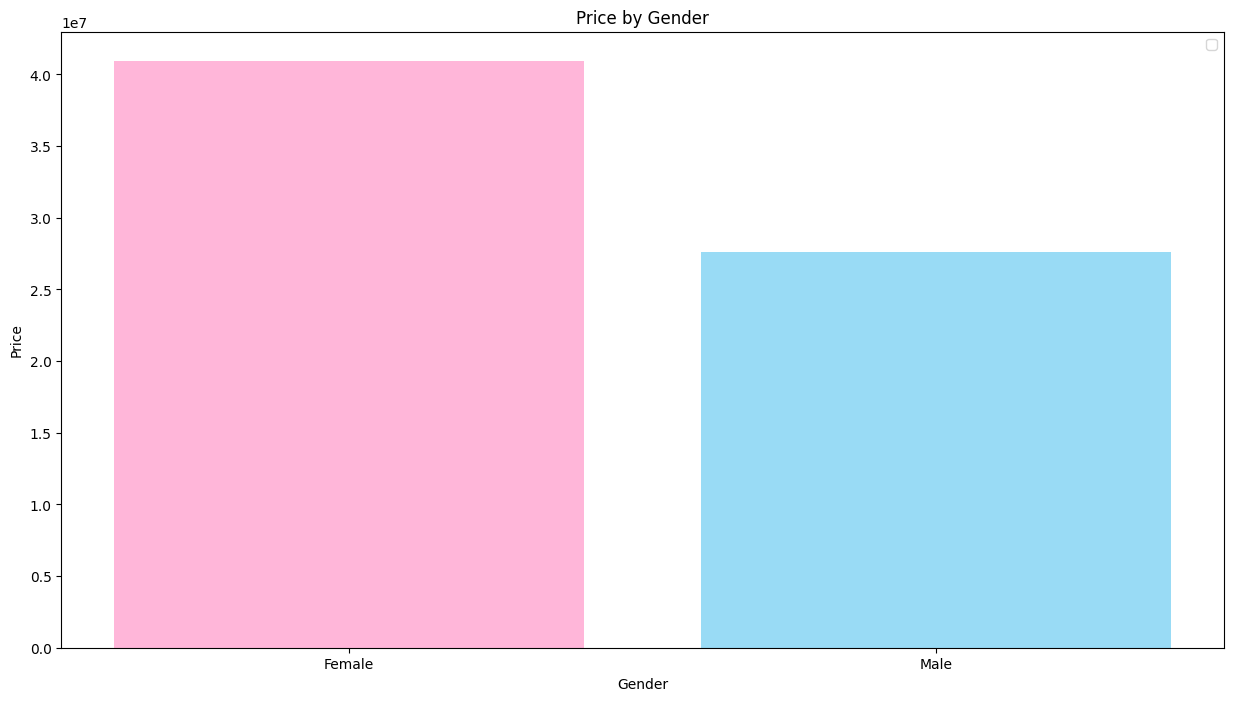

In [23]:
plt.figure(figsize=(15, 8))
colors = ["#FFB6D9", "#99DBF5"]
plt.bar(Genderwithprice['gender'],Genderwithprice['price'], color=colors)
plt.xlabel('Gender')
plt.ylabel('Price')
plt.title('Price by Gender')
plt.legend()
plt.show()

**from this Graph we can see the female pay money more than male**

In [24]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


<h2>Age<h2>

In [25]:
age = df['age'].value_counts().reset_index()
age

,age,count
0,37,2057
1,22,2051
2,64,2002
3,43,2000
4,51,1993
5,30,1981
6,24,1977
7,40,1960
8,48,1955
9,36,1954


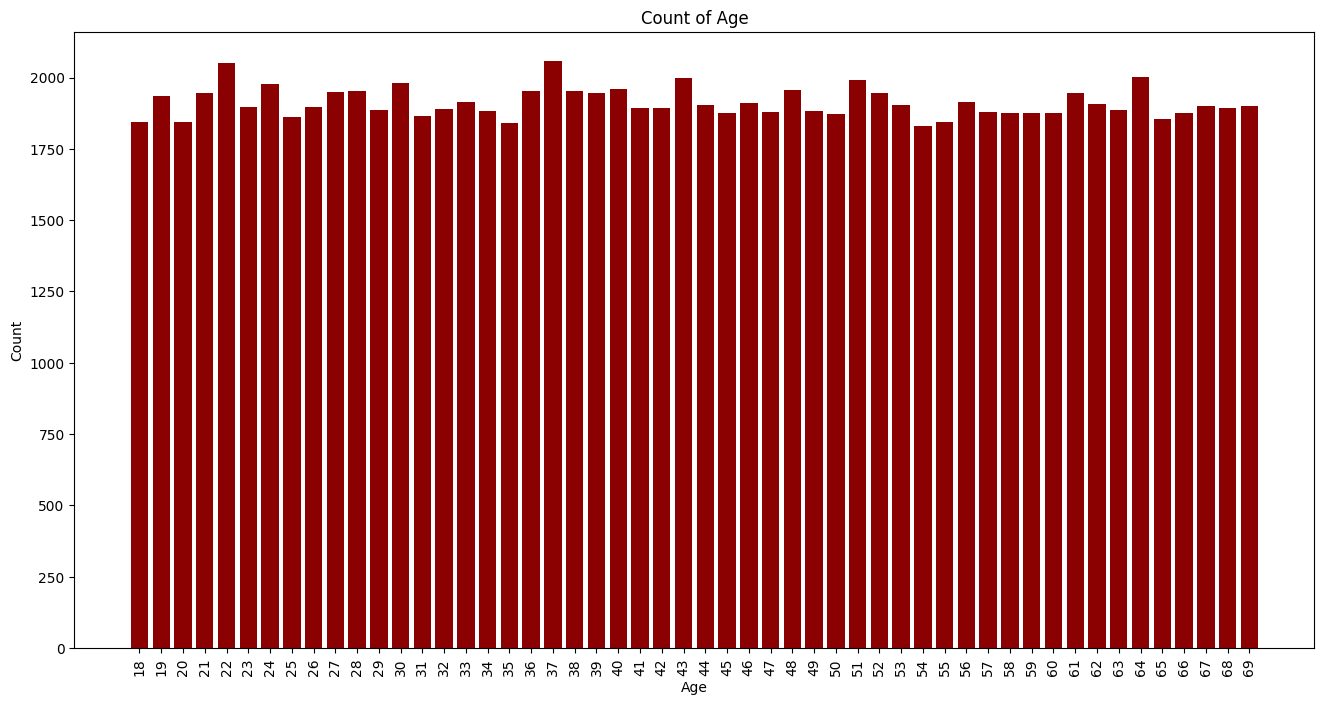

In [26]:
xticks = age['age']
plt.figure(figsize=(16, 8))
plt.bar(age['age'], age['count'],color ='darkred')
plt.xticks(xticks,rotation=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Age')
plt.show()

**From this graph we can determine the number for every age in data**

<h2>Age with Quantity<h2>

In [27]:
AgewithQuantity = df.groupby('age')['quantity'].sum().reset_index()
AgewithQuantity

,age,quantity
0,18,5518
1,19,5778
2,20,5505
3,21,5894
4,22,6148
5,23,5715
6,24,5957
7,25,5513
8,26,5672
9,27,5969


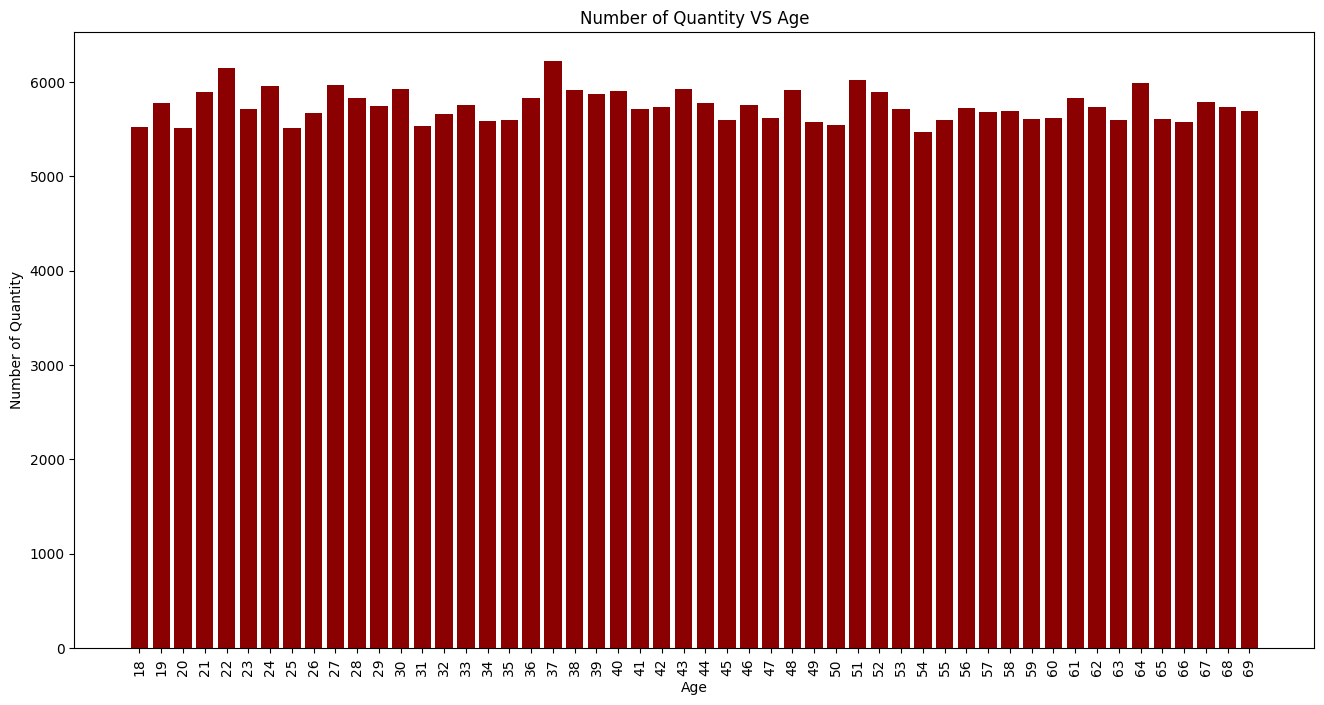

In [28]:
xticks = AgewithQuantity['age']
plt.figure(figsize=(16, 8))
plt.bar(AgewithQuantity['age'], AgewithQuantity['quantity'],color ="darkred")
plt.xticks(xticks,rotation=90)
plt.xlabel('Age')
plt.ylabel('Number of Quantity')
plt.title('Number of Quantity VS Age')
plt.show()

**this Graph show the number of quantity for every age**

<h2>Category with Quantity<h2>

In [29]:
Categorywithquantity = df.groupby('category')['quantity'].sum().reset_index()
Categorywithquantity

,category,quantity
0,Books,14982
1,Clothing,103558
2,Cosmetics,45465
3,Food & Beverage,44277
4,Shoes,30217
5,Souvenir,14871
6,Technology,15021
7,Toys,30321


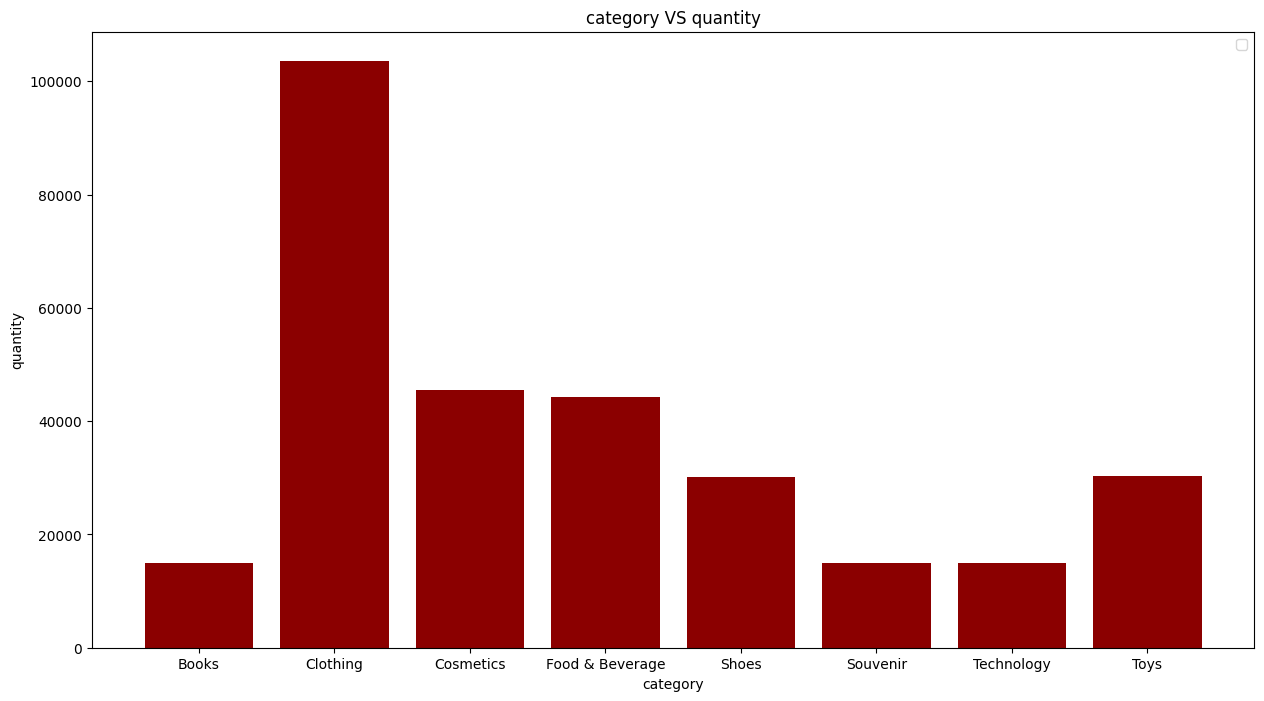

In [30]:
plt.figure(figsize=(15, 8))
plt.bar(Categorywithquantity['category'],Categorywithquantity['quantity'],color ="darkred")
plt.xlabel('category')
plt.ylabel('quantity')
plt.title('category VS quantity')
plt.legend()
plt.show()

**From this bar graph we can see the quantity for all Category that customer buy**

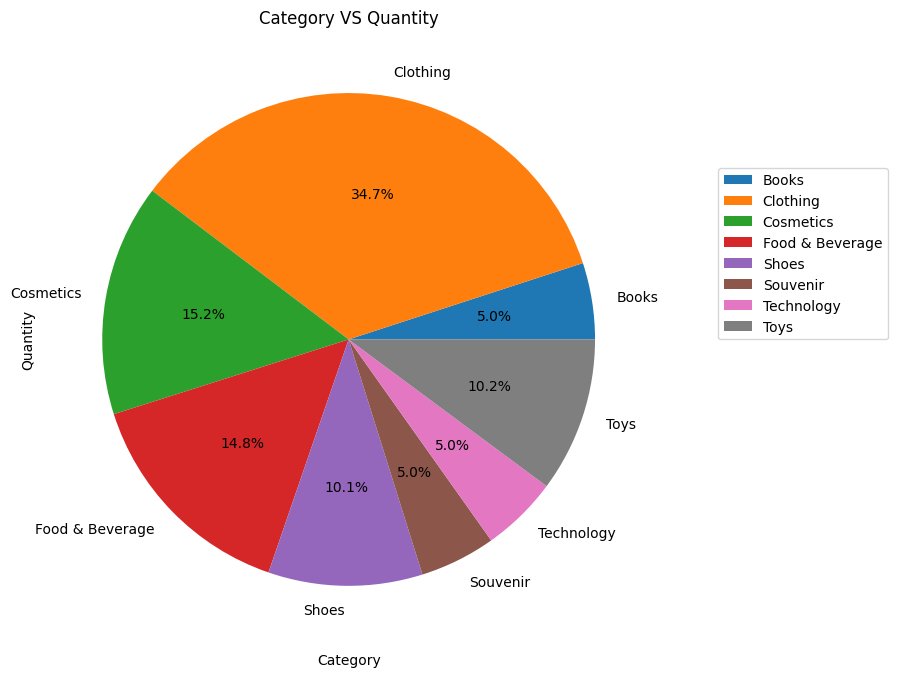

In [31]:
plt.figure(figsize=(8, 8))
plt.pie(Categorywithquantity['quantity'], labels=Categorywithquantity['category'], autopct='%1.1f%%')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Category VS Quantity')
plt.legend(loc=(1.1,.5))
plt.show()

**From this pie graph we can see the percentage of quantity for all Category that customer buy**

<h2>Category with Price<h2>

In [32]:
CategorywithPrice = df.groupby('category')['price'].sum().reset_index()
CategorywithPrice

,category,price
0,Books,226977.30
1,Clothing,31075684.64
2,Cosmetics,1848606.90
3,Food & Beverage,231568.71
4,Shoes,18135336.89
5,Souvenir,174436.83
6,Technology,15772050.00
7,Toys,1086704.64


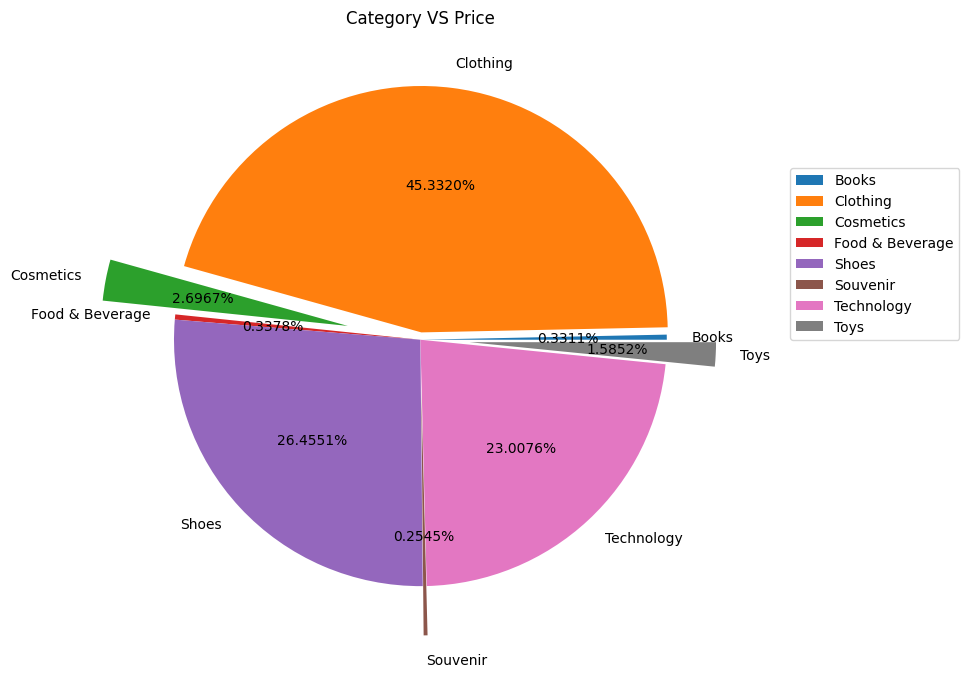

In [33]:
plt.figure(figsize=(8,8))
plt.pie(CategorywithPrice['price'],
        labels=CategorywithPrice['category'],autopct='%1.4f%%',
        explode=[0.0,0.03,0.3,0,0,0.2,0,0.2]
       )
plt.title('Category VS Price')
plt.legend(loc=(1.1,.5))
plt.show()

**From this pie graph we can see the percentage of price for all Category**

In [34]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


<h2>Price with years<h2>

In [35]:
Pricewithyears = df.groupby('year')['price'].sum().reset_index()
Pricewithyears

,year,price
0,2021,31316304.63
1,2022,31372826.18
2,2023,5862235.10


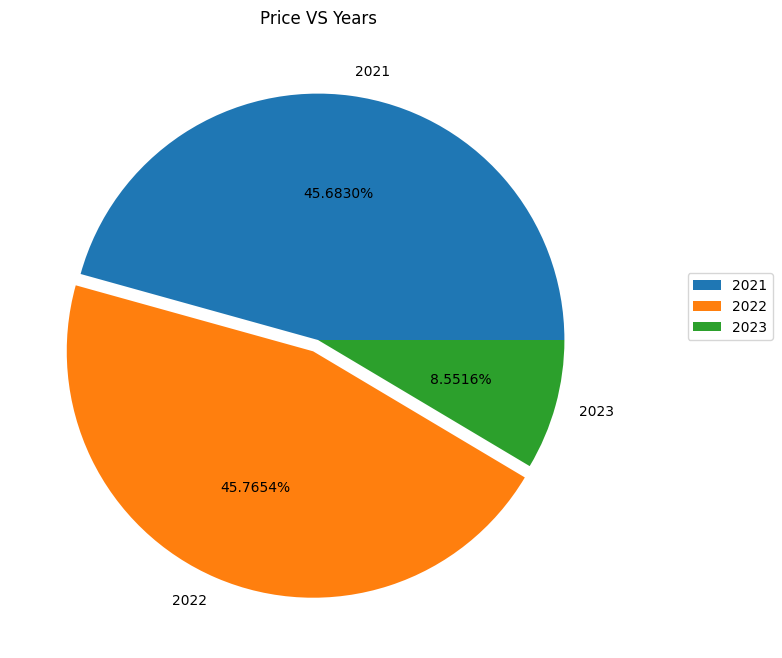

In [36]:
plt.figure(figsize=(8,8))
plt.pie(Pricewithyears['price'],
        labels=Pricewithyears['year'],autopct='%1.4f%%',
        explode=[0,0.05,0]
       )
plt.title('Price VS Years')
plt.legend(loc=(1.1,.5))
plt.show()

**From this pie we can see the biggest money get from sell is in 2021 and 2022**

****

<h2>payment_method<h2>

In [37]:
payment_method = df['payment_method'].value_counts().reset_index()
payment_method

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


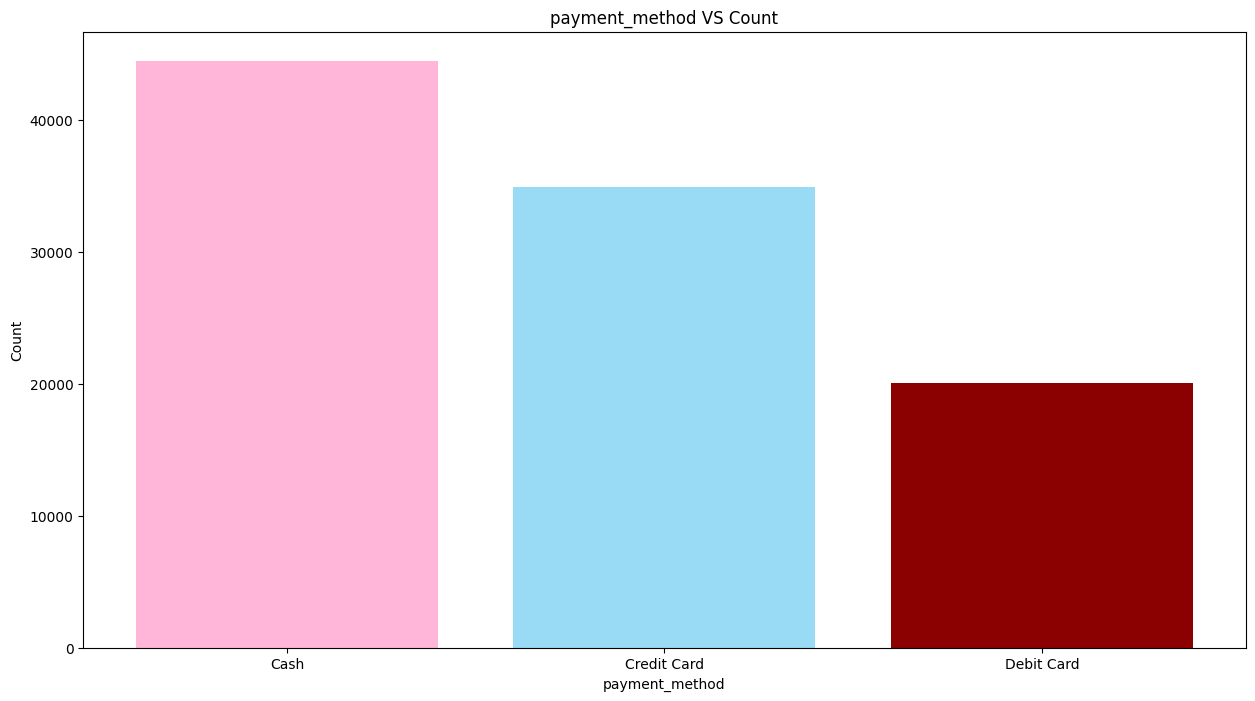

In [38]:
plt.figure(figsize=(15, 8))
plt.bar(payment_method['payment_method'],payment_method['count'],color=["#FFB6D9", "#99DBF5",'darkred'])
plt.title('payment_method VS Count')
plt.xlabel('payment_method')
plt.ylabel('Count')
plt.show()

**This bar show the number of operation that happen when way and how the cutomer pay**

In [39]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


<h2>shopping_mall<h2>

In [40]:
shopping_mall = df['shopping_mall'].value_counts().reset_index()
shopping_mall

,shopping_mall,count
0,Mall of Istanbul,19943
1,Kanyon,19823
2,Metrocity,15011
3,Metropol AVM,10161
4,Istinye Park,9781
5,Zorlu Center,5075
6,Cevahir AVM,4991
7,Forum Istanbul,4947
8,Viaport Outlet,4914
9,Emaar Square Mall,4811


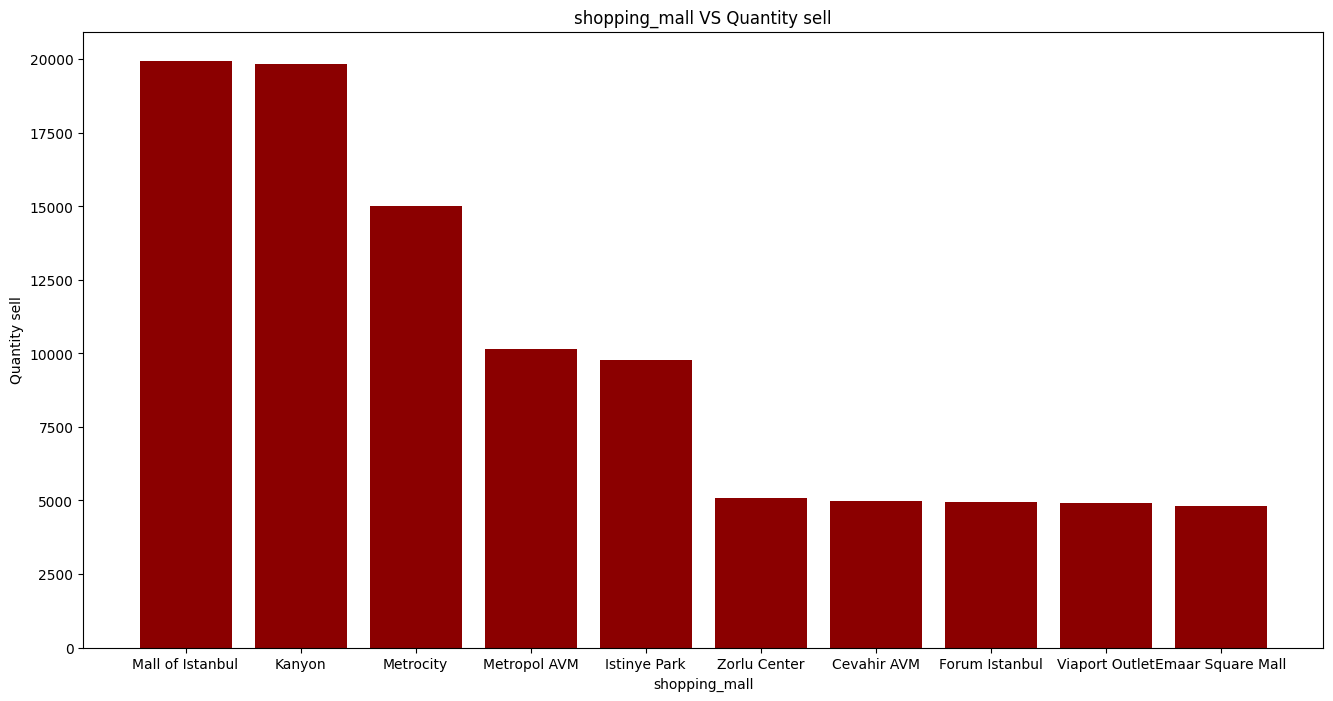

In [41]:
plt.figure(figsize=(16, 8))
plt.bar(shopping_mall['shopping_mall'],shopping_mall['count'],color='darkred')
plt.title('shopping_mall VS Quantity sell')
plt.xlabel('shopping_mall')
plt.ylabel('Quantity sell')
plt.show()

**This graph show the number of Category that sell from all malls**

<h2>Orders with Years<h2>

In [42]:
years_gender = df.groupby(['year', 'gender'])['year'].value_counts().reset_index()
years_gender

,year,gender,count
0,2021,Female,27156
1,2021,Male,18226
2,2022,Female,27192
3,2022,Male,18359
4,2023,Female,5134
5,2023,Male,3390


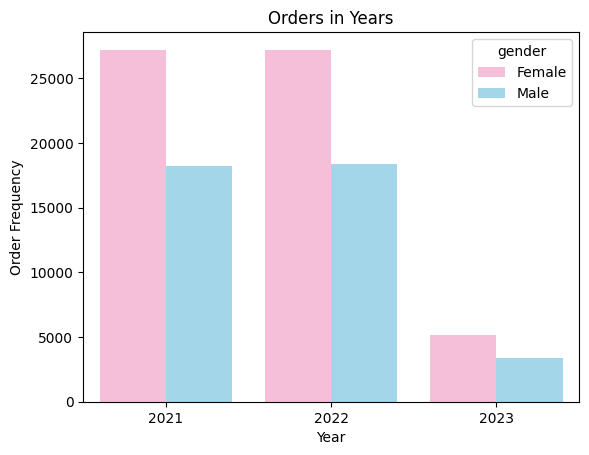

In [43]:
sns.barplot(data=years_gender, x='year', y='count', hue='gender',palette=["#FFB6D9", "#99DBF5"])
plt.xlabel('Year')
plt.ylabel('Order Frequency')
plt.title('Orders in Years')
plt.show()

**this Graph show the number of Orders in Years**

<h2>Order in months<h2>

In [44]:
months_gender = df.groupby(['month', 'gender'])['month'].value_counts().reset_index()
months_gender

,month,gender,count
0,1,Female,6923
1,1,Male,4685
2,2,Female,6252
3,2,Male,4230
4,3,Female,5248
5,3,Male,3482
6,4,Female,4481
7,4,Male,3006
8,5,Female,4649
9,5,Male,3048


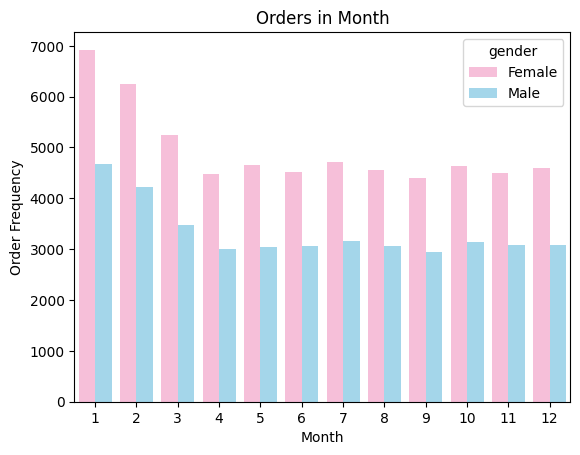

In [45]:
sns.barplot(data=months_gender, x='month', y='count', hue='gender',palette=["#FFB6D9", "#99DBF5"])
plt.xlabel('Month')
plt.ylabel('Order Frequency')
plt.title('Orders in Month')
plt.show()

**this Graph show the number of Orders in Months**

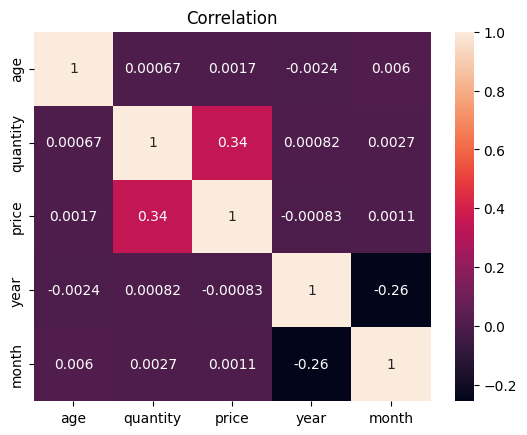

In [46]:
sns.heatmap(data=df.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation')
plt.show()

**Get the Correlation between the numrical columns**